In [ ]:
# Giải quyết bài toán người và quỷ qua sông

def check(O):
  if O[0] == O[1]:
    return True
  if O[0] == 0 or O[3] ==0:
    return True
  return False

def Children(O):
  res = []
  # 1 người qua sông
  if O[2] == 0:
    if O[0]>=1:
      child = [O[0]-1,O[1],1,O[3]+1,O[4]]
      if check(child):
        res.append(child)
  else:
    if O[3]>=1:
      child = [O[0]+1,O[1],0,O[3]-1,O[4]]
      if check(child):
        res.append(child)
  
  # 2 người qua sông
  if O[2] == 0:
    if O[0]>=2:
      child = [O[0]-2,O[1],1,O[3]+2,O[4]]
      if check(child):
        res.append(child)
  else:
    if O[3]>=2:
      child = [O[0]+2,O[1],0,O[3]-2,O[4]]
      if check(child):
        res.append(child) 
  # 1 quỷ qua sông
  if O[2] == 0:
    if O[1]>=1:
      child = [O[0],O[1]-1,1,O[3],O[4]+1]
      if check(child):
        res.append(child)
  else:
    if O[4]>=1:
      child = [O[0],O[1]+1,0,O[3],O[4]-1]
      if check(child):
        res.append(child)
  # 2 quỷ qua sông
  if O[2] == 0:
    if O[1]>=2:
      child = [O[0],O[1]-2,1,O[3],O[4]+2]
      if check(child):
        res.append(child)
  else:
    if O[4]>=2:
      child = [O[0],O[1]+2,0,O[3],O[4]-2]
      if check(child):
        res.append(child)
  # 1 người 1 quỷ qua sông
  if O[2] == 0:
    if O[0]>=1 and O[1]>=1:
      child = [O[0]-1,O[1]-1,1,O[3]+1,O[4]+1]
      if check(child):
        res.append(child)
  else:
    if O[3]>=1 and O[4]>=1:
      child = [O[0]+1,O[1]+1,0,O[3]-1,O[4]-1]
      if check(child):
        res.append(child) 
  return res

# (Người bên trái, quỷ bên trái, vị trí thuyền, NBP, QBP)
Start = [3,3,0,0,0]
Goal = [0,0,1,3,3]

OK = False
# Bước 1: Cho đỉnh xuất phát vào open. 
Open = [[Start,None]]
closed = []

# Bước 2 - 6: Nếu open rỗng thì tìm kiếm thất bại, kết thúc việc tìm kiếm.
while len(Open)>0:
  # Bước 3: Lấy đỉnh đầu trong open ra và gọi đó là ʘ. Cho ʘ vào closed
  O_totien = Open.pop()
  O = O_totien[0]
  closed.append(O)
  # Bước 4: Nếu ʘ là đỉnh đích thì tìm kiếm thành công, kết thúc việc tìm kiếm.
  if O == Goal:
    OK = True
    break
  #Bước 5: Tìm tất cả các đỉnh con của ʘ không thuộc open và closed cho vào cuối của open
  for child in Children(O):
    if child not in Open and child not in closed:
      Open.append([child,O_totien])

print(OK)
print(O_totien)

True
[[0, 0, 1, 3, 3], [[0, 2, 0, 3, 1], [[0, 1, 1, 3, 2], [[0, 3, 0, 3, 0], [[0, 2, 1, 3, 1], [[2, 2, 0, 1, 1], [[1, 1, 1, 2, 2], [[3, 1, 0, 0, 2], [[3, 0, 1, 0, 3], [[3, 2, 0, 0, 1], [[2, 2, 1, 1, 1], [[3, 3, 0, 0, 0], None]]]]]]]]]]]]


In [9]:
import random as rd
from queue import PriorityQueue
#Trò chơi 8 số

def Zero(S):
  n = len(S)
  for i in range(n):
    for j in range(n):
      if S[i][j] == 0:
        return (i,j)

# o = 0 : Up
# o = 1 : Down
# o = 2 : Left
# o = 3 : Right
def move(S,o):
  n = len(S)
  A = [list(_) for _ in S]
  i,j = Zero(S)
  if o==0:
    if i<n-1:
      A[i][j] = A[i+1][j]
      A[i+1][j] = 0
      return tuple([tuple(_) for _ in A])
  elif o==1:
    if i>0:
      A[i][j] = A[i-1][j]
      A[i-1][j] = 0
      return tuple([tuple(_) for _ in A])
  elif o==2:
    if j<n-1:
      A[i][j] = A[i][j+1]
      A[i][j+1] = 0
      return tuple([tuple(_) for _ in A])
  elif o==3:
    if j>0:
      A[i][j] = A[i][j-1]
      A[i][j-1] = 0
      return tuple([tuple(_) for _ in A])
  return None


def distance(S,G):
  ans = 0
  n = len(S)
  for i in range(n):
    for j in range(n):
      if S[i][j]!=G[i][j]:
        ans +=1
  return ans

#Goal = ((1,2,3),(4,5,6),(7,8,0))
Goal = ((1,2,3,4),(5,6,7,8),(9,10,11,12),(13,14,15,0))
Start = Goal
for _ in range(2000):
  c = move(Start,rd.randint(0,4))
  if c!=None:
    Start = c

for _ in Start: print(_)

OK = False
# Bước 1: Cho đỉnh xuất phát vào open. 
Open = PriorityQueue()
g = 0
h = distance(Start,Goal)
f = g+h
Open.put(((f,g),Start,None,None))
closed = {Start}

count = 0
# Bước 2 - 6: Nếu open rỗng thì tìm kiếm thất bại, kết thúc việc tìm kiếm.
while not Open.empty():
  count += 1
  # Bước 3: Lấy đỉnh đầu trong open ra và gọi đó là ʘ. Cho ʘ vào closed
  O_totien = Open.get()
  O = O_totien[1]
  # Bước 4: Nếu ʘ là đỉnh đích thì tìm kiếm thành công, kết thúc việc tìm kiếm.
  if O == Goal:
    OK = True
    break
  #Bước 5: Tìm tất cả các đỉnh con của ʘ không thuộc open và closed cho vào cuối của open
  for i in range(4):
    child = move(O,i)
    if child!=None and child not in closed:
      g = O_totien[0][1] + 1
      h = distance(child,Goal)
      f = g+h 
      Open.put(((f,g),child,i,O_totien))
      closed.add(child)

print(OK,count)

def Myprint(S):
  if S[3]!=None:
    Myprint(S[3])
    print(S[2])
  for _ in S[1]: print(_)

Myprint(O_totien)

(0, 12, 5, 8)
(10, 2, 1, 4)
(3, 13, 7, 9)
(14, 15, 11, 6)


KeyboardInterrupt: 

In [ ]:
# Hãy viết chương trình trò chơi Tic-Tac-Toe


In [ ]:
# cờ vua
import random
from termcolor import colored
from IPython.display import clear_output
import time
# K, k: Vua
# Q, q: Hậu
# R, r: Xe
# B, b: Tượng
# N, n: Mã
# P, p: Tốt
liR = [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0)]
liL = [(-1,0),(-2,0),(-3,0),(-4,0),(-5,0),(-6,0),(-7,0)]
liD = [(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7)]
liU = [(0,-1),(0,-2),(0,-3),(0,-4),(0,-5),(0,-6),(0,-7)]
liRD = [(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7)]
liLU = [(-1,-1),(-2,-2),(-3,-3),(-4,-4),(-5,-5),(-6,-6),(-7,-7)]
liRU = [(1,-1),(2,-2),(3,-3),(4,-4),(5,-5),(6,-6),(7,-7)]
liLD = [(-1,1),(-2,2),(-3,3),(-4,4),(-5,5),(-6,6),(-7,7)]
liN = [(1,2),(-1,2),(1,-2),(-1,-2),(2,1),(-2,1),(2,-1),(-2,-1)]
liK = [(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,1),(1,-1),(-1,-1)]

board = [['r','n','b','q','k','b','n','r'],
         ['p','p','p','p','p','p','p','p'],
         ['_','_','_','_','_','_','_','_'],
         ['_','_','_','_','_','_','_','_'],
         ['_','_','_','_','_','_','_','_'],
         ['_','_','_','_','_','_','_','_'],
         ['P','P','P','P','P','P','P','P'],
         ['R','N','B','Q','K','B','N','R']]

# kiểm tra có thể đi được hay không (Xe, Tượng, Hậu)
def Go(x,y,l,isContinue=False,canFight=True,needFight=False):
  li = []
  for dx,dy in l:
    x1 = x+dx
    y1 = y+dy
    if x1<0 or x1>=8 or y1<0 or y1>=8: 
      if not isContinue: 
        break 
      else: 
        continue
    if board[y1][x1] != '_':
      if canFight and board[y][x].islower() != board[y1][x1].islower():
        li.append((x1,y1))
      if not isContinue: break 
      else: continue
    if not needFight:
      li.append((x1,y1))
  return li


# các nước có thể đi của quân Xe
def Rr(x,y):
  return Go(x,y,liR) + Go(x,y,liL) + Go(x,y,liU) + Go(x,y,liD)

# các nước có thể đi của quân Tượng
def Bb(x,y):
  return Go(x,y,liRD) + Go(x,y,liLU) + Go(x,y,liRU) + Go(x,y,liLD)

# các nước có thể đi của quân Hậu
def Qq(x,y):
  return Rr(x,y) + Bb(x,y)

# các nước có thể đi của quân Mã
def Nn(x,y):
  return Go(x,y,liN,isContinue=True)

# các nước có thể đi của quân Vua
def Kk(x,y):
  return Go(x,y,liK,isContinue=True)

# các nước có thể đi của quân Tốt
def Pp(x,y):
  li = []
  dx = 1
  if not board[y][x].islower():
    dx = -1
  # nước có thể đi
  if y==1 or y==6:
    li = li + Go(x,y,[(0,dx),(0,2*dx)],canFight=False)
  else:
    li = li + Go(x,y,[(0,dx)], canFight=False)
  # nước có thể ăn (tốt ăn chéo)
  li = li + Go(x,y,[(-1,dx),(1,dx)],needFight=True)
  return li

# x, y là tọa độ quân cờ
# islower lượt của quân thường (True) hay quân hoa (False)
# return danh sách tọa độ các nước có thể di chuyển tới
def CanGo(x,y,islower):
  if board[y][x].islower() != islower:
    return []
  if (board[y][x] in "Rr"):
    return Rr(x,y)
  if (board[y][x] in "Nn"):
   return Nn(x,y)
  if (board[y][x] in "Bb"):
    return Bb(x,y)
  if (board[y][x] in "Qq"):
    return Qq(x,y)
  if (board[y][x] in "Kk"):
    return Kk(x,y)
  if (board[y][x] in "Pp"):
    return Pp(x,y)
  return []


def isFinish(board):
  U = False
  L = False
  for _ in board:
    U = U or ('K' in _)
    L = L or ('k' in _)
  return not (U and L)

# return tất cả các nước có thể di chuyển (y,x) -> (y1,x1)
def CanGoList(board,islower):
  li = []
  for y in range(8):
    for x in range(8):
      l = CanGo(x,y,islower)
      for x1,y1 in l:
        li = li + [(y,x,y1,x1)]
  return li

def CPURandomTurn(board,islower):
  #######################################################
  #  Có thể bỏ time.sleep(1) để xem kết quả nhanh hơn   #
  ####################################################### 
  #time.sleep(1)
  li = CanGoList(board,islower)
  return random.choice(li)

def CPUMiniMaxTurn(board,islower,depth = 2):
  #######################################################
  #  Nên dùng Minimax với độ sâu từ 2 đến 4             #
  #######################################################
  li = CanGoList(board,islower)
  Max = -1000
  for y,x,y1,x1 in CanGoList(board,islower):
    child = [_[:] for _ in board]
    child[y1][x1] = child[y][x]
    child[y][x] = '_'
    vl = Minimax(child,depth-1,islower,not islower)
    if Max < vl or (Max == vl and random.choice([0,1])==0):
      Max = vl
      r = (y,x,y1,x1)
  return r

# Board: Bàn cờ hiện tại
# islower: lượt của quân viết thường (True) hay quân viết hoa (False)
# return: giá trị của bàn cờ đối với quân viết thường
def value(board,islower):
  vl = 0
  ######################################################
  #  Cần định nghĩa lại hàm value                      #
  #  Gợi ý:                                            #
  #       1. Hiệu số quân cờ 2 bên                     #
  #       2. Vị trí quân cờ trên bàn cờ                #
  #       3. Tùy suy nghĩ của các em                   #
  ######################################################
  return vl

# node là node hiện tại
# depth là độ sâu
# Pmax là player cần tìm Max
# Pnow là player hiện tại
def Minimax(node,depth,Pmax,Pnow):
  if isFinish(node) or depth ==0:
    return value(node,Pmax)
  if Pmax == Pnow:
    Max = -1000
    for y,x,y1,x1 in CanGoList(node,Pnow):
      child = [_[:] for _ in node]
      child[y1][x1] = child[y][x]
      child[y][x] = '_'
      Max = max(Max,Minimax(child,depth-1,Pmax,not Pnow))
    return Max
  else:
    Min = 1000
    for y,x,y1,x1 in CanGoList(node,Pnow):
      child = [_[:] for _ in node]
      child[y1][x1] = child[y][x]
      child[y][x] = '_'
      Min = min(Min,Minimax(child,depth-1,Pmax,not Pnow))
    return Min


def printBoard(board):
  print("+",*range(8),"+")

  for i in range(8):
    print(i,end=" ")
    for j in range(8):
      if board[i][j] == '_':
        print(board[i][j],end=" ")
      elif board[i][j].islower():
        print(colored(board[i][j],'red'),end=" ")
      else:
        print(colored(board[i][j],'blue'),end=" ")
    print(i,) 

  print("+",*range(8),"+")
  print()

Random = True
MiniMax = False
Now = Random

while not isFinish(board):
  clear_output()
  printBoard(board)
  print("----",Now,"turn","----")
  if Now == MiniMax:
    y,x,y1,x1 = CPUMiniMaxTurn(board,MiniMax)
    board[y1][x1] = board[y][x]
    board[y][x] = '_'
    Now = Random
    print(y,x,y1,x1)
  else:
    y,x,y1,x1 = CPURandomTurn(board,Random)
    board[y1][x1] = board[y][x]
    board[y][x] = '_'
    print(y,x,y1,x1)
    Now = MiniMax

printBoard(board)
if Now:
  print("Minimax Won")
else:
  print("Random Won")

+ 0 1 2 3 4 5 6 7 +
0 _ _ _ _ _ _ B _ 0
1 _ N _ _ _ _ _ _ 1
2 _ P K _ _ _ _ _ 2
3 _ _ _ k _ _ _ _ 3
4 _ _ _ _ _ _ _ _ 4
5 _ _ _ p _ _ _ _ 5
6 _ B _ r _ _ _ _ 6
7 _ _ _ _ _ _ _ _ 7
+ 0 1 2 3 4 5 6 7 +

---- True turn ----
3 3 2 2
+ 0 1 2 3 4 5 6 7 +
0 _ _ _ _ _ _ B _ 0
1 _ N _ _ _ _ _ _ 1
2 _ P k _ _ _ _ _ 2
3 _ _ _ _ _ _ _ _ 3
4 _ _ _ _ _ _ _ _ 4
5 _ _ _ p _ _ _ _ 5
6 _ B _ r _ _ _ _ 6
7 _ _ _ _ _ _ _ _ 7
+ 0 1 2 3 4 5 6 7 +

Random Won


In [ ]:
import random as rd
# Bài toán tìm tổ hợp các món ăn sao cho đủ hết các chất dinh dưỡng và giá tiền nhỏ nhất
FoodName=["Tao","Cherry","Cam","Quyt","Duahau","Chanh","Kiwi","Nho",
						"DuaLuoi","DaoTien","Chuoi","DauTay","Thom","Le","SuaBo","CaChua",
						"CaRot","CaTim","HanhTay","Toi","KhoaiTay","Nam","BanhMy","PhoMai",
						"Bia","Ngheu","Cua","Ca","Tom","Ga","Bo","Trung"]
Food=[[0,0,1,1,0,0,0,0,0,0],[0,0,1,0,0,0,1,1,0,0],[0,0,1,0,0,0,0,0,1,1],[0,0,1,1,1,0,0,0,0,1],
			[0,0,1,0,0,0,0,1,0,0],[0,0,0,1,0,0,1,0,0,1],[0,0,1,1,1,0,0,1,0,1],[0,0,1,0,0,1,0,0,0,0],
			[0,0,0,0,0,1,1,0,1,0],[0,0,1,1,0,1,0,0,0,0],[0,0,1,0,0,1,0,0,0,1],[0,0,1,1,0,0,1,0,0,1],
			[0,0,1,0,0,0,0,0,1,0],[0,0,1,0,0,0,0,0,0,0],[1,1,1,0,1,1,0,1,0,0],[0,0,1,0,0,1,0,1,0,1],
			[0,0,1,1,0,0,1,1,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,1,0,1,1,0,0,0,0],[1,0,0,1,0,0,1,0,1,1],
			[0,0,1,0,0,0,0,0,0,1],[0,0,1,1,0,0,0,0,0,0],[1,1,1,0,0,0,0,0,0,0],[1,1,0,0,1,1,0,0,0,0],
			[0,0,1,0,0,0,0,0,0,0],[1,0,0,0,1,1,0,0,1,0],[1,0,0,0,1,1,0,0,0,0],[1,1,0,0,0,0,0,0,1,0],
			[1,0,0,0,1,0,1,0,0,0],[1,0,0,0,0,1,0,1,0,0],[1,1,0,0,0,1,0,0,0,0],[1,1,0,0,1,1,0,1,0,0]]
FoodValue=[31,66,55,70,34,50,106,38,
			62,49,55,82,33,13,118,54,
			83,15,56,123,32,40,52,63,
			18,74,49,62,64,55,70,100]

def KhoiTao():
  global ng,f,n
  ng = [[rd.randint(0,1) for __ in range(32)] for _ in range(n)]

def DanhGia():
  global ng,f,n
  f = [None]*n
  for j in range(n):
    g = ng[j]
    tien = 0
    for i in range(32):
      tien += FoodValue[i]*g[i]
   
    dinhduong = 0
    for k in range(10):
      co = 0
      for i in range(32):
        if g[i] == 1 and Food[i][k] == 1:
          co = 1
      dinhduong += co
    f[j] = tien - 50*dinhduong

def PrintBest():
  global ng,f,n
  fc = [_ for _ in f]
  fc.sort()
  best = fc[0]
  for j in range(n):
    if f[j]==best:
      tien = 0
      for i in range(32):
        if ng[j][i] == 1:
          tien += FoodValue[i]
          print(FoodName[i],end=",")
      print(tien,end=",")
      dinhduong = 0
      for k in range(10):
        co = 0
        for i in range(32):
          if ng[j][i] == 1 and Food[i][k] == 1:
            co = 1
        dinhduong += co
      print(dinhduong)
      break

def LuaChon():
  global ng,f,n
  fc = [_ for _ in f]
  fc.sort()
  nguong = fc[80*n//100]
  for i in range(n):
    if f[i]>nguong:
      ng[i] = [_ for _ in ng[rd.randrange(0,n)]]

def LaiGhep():
  global ng,f,n
  for _ in range(n*30//100):
    cha = rd.randrange(0,n)
    me = rd.randrange(0,n)
    for i in range(32):
      if rd.randint(0,1)==0:
        ng[cha][i],ng[me][i] = ng[me][i],ng[cha][i]

def DotBien():
  global ng,f,n
  dt = rd.randrange(0,n)
  k = rd.randrange(0,32)
  ng[dt][k] = 1-ng[dt][k]

n = 100
KhoiTao()
for _ in range(100):
  DanhGia()
  PrintBest()
  LuaChon()
  LaiGhep()
  DotBien()


Tao,Cherry,DaoTien,Chuoi,Le,CaChua,CaTim,Toi,PhoMai,469,10
Tao,Cherry,DaoTien,Chuoi,Le,CaChua,CaTim,Toi,PhoMai,469,10
Tao,Cherry,DaoTien,Chuoi,Le,CaChua,CaTim,Toi,PhoMai,469,10
Thom,SuaBo,CaChua,CaRot,CaTim,Bo,373,10
Thom,SuaBo,CaChua,CaRot,CaTim,Bo,373,10
Thom,SuaBo,CaChua,CaRot,CaTim,Bo,373,10
Duahau,Chanh,Nho,DaoTien,Thom,CaTim,HanhTay,BanhMy,Ca,Bo,459,10
Cherry,Chanh,Kiwi,CaTim,HanhTay,BanhMy,Cua,Ca,456,10
Duahau,DaoTien,Thom,KhoaiTay,PhoMai,211,9
Cherry,DuaLuoi,CaChua,HanhTay,KhoaiTay,BanhMy,Cua,371,9
Le,Tom,Trung,177,7
Tao,Cherry,Nho,Thom,BanhMy,Cua,269,9
Tao,Quyt,Nho,Thom,Le,CaTim,Ngheu,274,8
Quyt,Chanh,Nho,Thom,CaTim,HanhTay,BanhMy,314,10
Le,CaTim,KhoaiTay,Nam,PhoMai,Ngheu,237,9
Le,CaTim,KhoaiTay,Nam,PhoMai,Ngheu,237,9
Le,CaTim,KhoaiTay,Nam,PhoMai,Ngheu,237,9
Chanh,Thom,BanhMy,Cua,184,9
Chanh,Thom,BanhMy,Cua,184,9
Chanh,Thom,BanhMy,Cua,184,9
Le,CaTim,KhoaiTay,PhoMai,123,7
Chanh,KhoaiTay,BanhMy,Cua,183,8
Duahau,Chanh,Cua,133,8
Duahau,Chanh,Le,PhoMai,160,9
Chanh,Thom,Le,CaTim,Cua

0 37082.13328745022
10 30172.059915914975
20 27816.620206830437
30 29207.822486932
40 29207.822486932
50 29317.23536468914
60 28401.860985700703
70 27816.620206830437
80 27816.620206830437
90 28401.860985700703
100 27816.620206830437
110 27816.620206830437
120 27816.620206830437
130 27816.620206830437
140 27816.620206830437
150 27816.620206830437
160 27816.620206830434
170 27816.620206830437
180 27816.620206830434
190 27816.620206830434
200 27816.620206830434
210 27816.620206830437
220 27816.620206830437
230 27816.620206830437
240 27816.620206830437
250 27816.620206830437
260 27816.620206830437
270 27816.620206830437
280 27816.620206830437
290 27816.620206830437
300 27816.620206830437
310 27816.620206830437
320 27816.620206830437
330 27816.620206830437
340 27816.620206830437
350 27816.620206830437
360 27816.620206830437
370 27816.620206830437
380 27816.620206830437
390 27816.620206830437
400 27816.620206830437
410 27816.620206830437
420 27816.620206830437
430 27816.620206830437
440 278

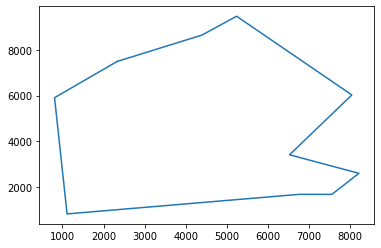

In [ ]:
# Hãy viết chương trình sử dụng GA giải quyết bài toán người bán hàng
import random as rd
import matplotlib.pyplot as mpl

def MyPlot(n,cityPos,a):
  mpl.cla()
  X = [0]* (n+1)
  Y = [0]* (n+1)
  for i in range(n+1):
    ii = a[i%n]
    X[i] = cityPos[ii][0]
    Y[i] = cityPos[ii][1]
  mpl.plot(X,Y)

citynum = 50
cityPos = [(rd.randint(0,10000),rd.randint(0,10000)) for _ in range(citynum)]
n = 1000
ng = [None]*n
f = [None]*n

def KhoiTao():
  global citynum,cityPos,n,ng;
  for i in range(n):
    a = list(range(citynum))
    rd.shuffle(a)
    ng[i] = a

def Distance(a,b):
  return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

def DanhGia():
  global citynum,cityPos,n,ng,f;
  for i in range(n):
    distance = 0
    for j in range(citynum):
      distance += Distance(cityPos[ng[i][j]],cityPos[ng[i][(j+1)%citynum]])
    f[i] = distance

def PlotBest(num):
  global citynum,cityPos,n,ng,f;
  fc = [_ for _ in f]
  fc.sort()
  best = fc[0]
  for i in range(n):
    if f[i]==best:
      if num%10==0:
        MyPlot(citynum,cityPos,ng[i])
        print(num,f[i])
      break

def LuaChon():
  global citynum,cityPos,n,ng,f;
  fc = [_ for _ in f]
  fc.sort()
  nguong = fc[80*n//100]
  for i in range(n):
    if f[i]>nguong:
      ng[i] = [_ for _ in ng[rd.randrange(0,n)]]

def LaiGhep():
  global citynum,cityPos,n,ng,f;
  for _ in range(30*n//100):
    cha = rd.randrange(0,n)
    me = rd.randrange(0,n)
    # Gợi ý:
    # Tìm 1 vị trí cắt 
    k = rd.randrange(0,citynum)
    # Con thứ 1: Lấy đầu của cha và đuôi là những thành phố còn lại theo trật tự của mẹ
    dau1 = ng[cha][0:k]
    duoi1 = [0]*(citynum-k)
    count = 0
    #ngme = ng[me][k:]+ng[me][0:k]
    for i in ng[me]:
      if i not in dau1:
        duoi1[count] = i
        count +=1
    # Con thứ 2: Lấy đầu của mẹ và đuôi là những thành phố còn lại theo trật tự của cha
    dau2 = ng[me][0:k]
    duoi2 = [0]*(citynum-k)
    count = 0
    #ngcha = ng[cha][k:]+ng[cha][0:k]
    for i in ng[cha]:
      if i not in dau2:
        duoi2[count] = i
        count +=1
    ng[cha] = dau1+duoi1
    ng[me] = dau2+duoi2


def DotBien():
  global citynum,cityPos,n,ng,f;
  for _ in range(10*n//100):
    dt = rd.randrange(0,n)
    k1 = rd.randrange(0,citynum)
    k2 = rd.randrange(0,citynum)
    tmp = ng[dt][k1:k2+1]
    tmp.reverse()
    #ng[dt][k1:k2+1] = tmp
    ng[dt][k1],ng[dt][k2] = ng[dt][k2],ng[dt][k1]


KhoiTao()
for _ in range(1000):
  DanhGia()
  PlotBest(_)
  LuaChon()
  LaiGhep()
  DotBien()

# a = list(range(citynum))
# rd.shuffle(a)
# MyPlot(citynum,cityPos,a)




In [2]:
import random as rd
D = [[0,3],[2,0],[0,4],[4,1]]
k = 2


def Distance(a,b):
  sum = 0
  for i in range(len(a)):
    sum +=(a[i]-b[i])**2
  return sum

def argmin(x,mu):
  id = -1
  dis = 0
  for i in range(len(mu)):
    d = Distance(x,mu[i])
    if id ==-1 or dis>d:
      id = i
      dis = d
  return id

def kmean(D,k):
  # B1: chọn ngẫu nhiên k phần tử từ D để làm tâm của k nhóm
  mu = [list(x) for x in rd.sample(D,k)]
  C = []
  count = 0
  while True:
    # B2: gán phần tử của D vào nhóm có khoảng cách tới trọng tâm gần nhất
    C_old = C[:]
    C = [argmin(x,mu) for x in D]
    if C_old==C:
      break
    # B3: tính lại tâm của k nhóm
    for i in range(len(mu)):
      for j in range(len(mu[i])):
        mu[i][j] = 0
    sl = [0]*len(mu)
    for i in range(len(D)):
      for j in range(len(D[i])):
        mu[C[i]][j] += D[i][j]
      sl[C[i]] += 1
    for i in range(len(mu)):
      if sl[i]!=0:
        mu[i] = [mu[i][j]//sl[i] for j in range(len(mu[i]))]
      else:
        mu[i] = rd.sample(D,1)[0][:]
  return C,mu

print(kmean(D,k))

([0, 1, 0, 1], [[0, 3], [3, 0]])


In [6]:
from PIL import Image
import requests
import numpy as np

#url = "https://i1-vnexpress.vnecdn.net/2022/04/27/b771c25b143ad5648c2b9-1651032829.jpg?w=220&h=132&q=100&dpr=1&fit=crop&s=-UBBbtkkHypEgeUz5Z2U2w"
#url = "https://1.bp.blogspot.com/-D4NvUDjIa84/YJQS5gnwbpI/AAAAAAAAoHQ/aCNJB38Z-Z0Qu2tY1GE4onQaiWMjMQ2VQCLcBGAsYHQ/s2048/bungalows-3840x2160-4k-hd-wallpaper-reef-french-polynesia-water-594.webp"
url = "https://www.luavietours.com/contents_luavietours/upload/Image/10-dia-danh-dep-me-hon-tren-the-gioi-hinh-10.jpg"
im = Image.open(requests.get(url, stream=True).raw)

pix_val = list(im.getdata())

print("start")
C,mu = kmean(rd.sample(pix_val,1000),15)
print("stop")
new_pix_val = [None]*len(pix_val)
for i in range(len(pix_val)):
  new_pix_val[i] = tuple(mu[argmin(pix_val[i],mu)])


array = np.array(new_pix_val, dtype=np.uint8)
array = array.reshape((im.size[1],im.size[0],3))

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
new_image.save('new.png')


start
stop


In [7]:
def f(x):
  #black box
  return (4-x)**4

In [8]:
def f1(x):
  delta = 0.000000001
  return (f(x+delta/2)-f(x-delta/2))/delta

def main():
  alpha = 1
  x = 100
  print(f(x),x)
  for i in range(100):
    x_new = x - alpha*f1(x)
    if f(x_new)>f(x):
      alpha /=2
    else:
      x = x_new
      alpha *=2
    print(alpha, f(x),x)

main()

84934656 100
0.5 84934656 100
0.25 84934656 100
0.125 84934656 100
0.0625 84934656 100
0.03125 84934656 100
0.015625 84934656 100
0.0078125 84934656 100
0.00390625 84934656 100
0.001953125 84934656 100
0.0009765625 84934656 100
0.00048828125 84934656 100
0.000244140625 84934656 100
0.0001220703125 84934656 100
6.103515625e-05 84934656 100
3.0517578125e-05 84934656 100
6.103515625e-05 20728.106632713807 -7.9988578567281365
0.0001220703125 17963.859754987 -7.577103447553668
0.000244140625 13703.166769368618 -6.819451284323463
0.00048828125 8432.071585550379 -5.582604659204549
0.0009765625 3824.45599913677 -3.863980305263226
0.001953125 1265.404056976084 -1.9642701383105534
0.00390625 344.0279522720653 -0.30673780470067435
0.0078125 87.51574428649992 0.9414080042290605
0.015625 21.947077519661228 1.8355668622959338
0.03125 5.489719332403732 2.469308976638018
0.0625 1.3725564356464648 2.9176130371787674
0.125 0.343144569080666 3.2346337940468923
0.25 0.08578637585352152 3.4588039972804014


In [4]:
data = [[22,28,146,34],
[36,46,169,57],
[24,39,160,48],
[22,25,156,38],
[27,34,161,47],
[29,29,168,50],
[26,38,154,54],
[23,23,153,40],
[31,42,160,62],
[24,27,152,39],
[23,35,155,46],
[27,39,154,54],
[31,38,157,57],
[25,32,162,53],
[23,25,142,32]]

def y(x,a):
  return a[0] + a[1]*x[1]+a[2]*x[2]+a[3]*x[3]


def e(a):
  sum = 0
  for x in data:
    sum += (x[0] - y(x,a))**2
  return sum

def e1(a,i):
  d = 0.00001
  aa = a[:]
  aa[i] += d
  return (e(aa) - e(a))/d

# Tìm a sao cho e(a) nhỏ nhất
def main():
  a = [0,0,0,0]
  alpha = 1
  for _ in range(10000):
    aa = a[:]
    for i in range(4):
      aa[i] = a[i] - alpha*e1(a,i)
    if e(aa)>e(a):
      alpha /=2
    else:
      a = aa
      alpha *= 2
    if _%100==0:
      print(alpha,e(a),a)

main()


0.5 10525 [0, 0, 0, 0]
1.9073486328125e-06 106.06878404036378 [0.000693850459983973, 0.05711389685929452, 0.13340143625802142, 0.07613013451981719]
7.62939453125e-06 91.71342547916637 [0.00041085763624821095, 0.08313791765966617, 0.11665252850840477, 0.10750839415164014]
1.9073486328125e-06 83.99863888347403 [0.0002069035009294451, 0.10232961909351204, 0.10694213650136541, 0.13042720201372485]
1.9073486328125e-06 79.5868725290897 [2.801446371972563e-05, 0.1167917338019345, 0.09837041415857785, 0.14732625471450372]
1.9073486328125e-06 77.20198949462659 [-0.00012177255739680669, 0.12795073257558395, 0.09225497563964828, 0.16007880241259692]
1.9073486328125e-06 75.82842955788092 [-0.00025035755656912986, 0.13622349392227573, 0.08746413742696586, 0.16922641952571366]
7.62939453125e-06 75.0772523527515 [-0.0003670287229739014, 0.1426648640236692, 0.08364279771950414, 0.17605568493806323]
1.9073486328125e-06 74.67211480741193 [-0.00046356103743463474, 0.14750136857285692, 0.08142000251974374

In [ ]:
# train độc lập
from sklearn import datasets
import math
iris = datasets.load_iris()
X = iris.data
Y = iris.target

def o(W,x):
  sum = W[0]
  for i in range(len(W)-1):
    sum += W[i+1]*x[i]
  return math.exp(sum)/(1+math.exp(sum))

def e(W,X,y):
  sum = 0;
  for i in range(len(X)):
    sum += (y[i]-o(W,X[i]))**2
  return sum
def e1(W,i,X,y):
  d = 0.00001
  WW = W[:]
  WW[i] += d
  return (e(WW,X,y) - e(W,X,y))/d

def learnModel(X,y):
  W = [0]*(len(X[0])+1)
  alpha = 1
  for _ in range(100):
    W_new = W[:]
    for i in range(len(W)):
      W_new[i] = W[i] - alpha*e1(W,i,X,y)
    e_new = e(W_new,X,y)
    e_ = e(W,X,y)
    if e_new>e_:
      alpha /=2
    elif e_new<e_:
      W = W_new
      alpha *= 2
    else:
      break
  return W

model = [None]*3
for i in range(3):
  y = list(Y)[:]
  for j in range(len(y)):
    if y[j]==i:
      y[j] = 1
    else:
      y[j] = 0
  model[i] = learnModel(X,y)

#softMax
for i in range(len(X)):
  maxj = 0
  maxV = 0
  for j in range(3):
    o_ = o(model[j],X[i])
    if maxV<o_:
      maxV=o_
      maxj=j
  print(Y[i],maxj)

In [ ]:
# train có liên kết softMax
from sklearn import datasets
import math
iris = datasets.load_iris()
X = iris.data
Y = iris.target

def o(W,x):
  sum = W[0]
  for i in range(len(W)-1):
    sum += W[i+1]*x[i]
  return math.exp(sum)/(1+math.exp(sum))

def o_fM(W_all,x):
  return [o(W_all[j],x) for j in range(len(W_all))]

def e(W_all,X,Y):
  sum = 0
  for i in range(len(X)):
    O = [0]*len(W_all)
    O[Y[i]] = 1
    o = o_fM(W_all,X[i])
    for j in range(len(W_all)):
      sum += (O[j]-o[j])**2
  return sum

def e1(W_all,j,i,X,Y):
  d = 0.00001
  WW = [W[:] for W in W_all]
  WW[j][i] += d
  return (e(WW,X,Y) - e(W_all,X,Y))/d

def learnModel(X,Y):
  W_all = [[0]*(len(X[0])+1) for _ in range(3)]
  alpha = 1
  for _ in range(100):
    W_new = [W[:] for W in W_all]
    for j in range(len(W_all)):
      for i in range(len(W_all[j])):
        W_new[j][i] = W_all[j][i] - alpha*e1(W_all,j,i,X,Y)
    e_new = e(W_new,X,Y)
    e_ = e(W_all,X,Y)
    if e_new>e_:
      alpha /=2
    elif e_new<e_:
      W_all = W_new
      alpha *= 2
    else:
      break
  return W_all

model = learnModel(X,Y)
print(model)
for i in range(len(X)):
  maxj = 0
  maxV = 0
  oo = o_fM(model,X[i])
  for j in range(3):
    if maxV<oo[j]:
      maxV=oo[j]
      maxj=j
  print(maxj,Y[i])


In [ ]:
# Bài tập: 
# Hãy thêm 1 lớp ẩn với số lượng nơron tại lớp đó tùy ý. 
# Xây dựng chương trình tìm tham số W tại tất cả các nơron đó.

# train có liên kết softMax
from sklearn import datasets
import math
import random as rd
iris = datasets.load_iris()
X = iris.data
Y = iris.target

def o(W,x):
  sum = W[0]
  for i in range(len(W)-1):
    sum += W[i+1]*x[i]
  return math.exp(sum)/(1+math.exp(sum))

def layout(WW,x):
  return [o(W,x) for W in WW]

def network(WWW,x):
  for WW in WWW:
    x = layout(WW,x)
  return x

def e(WWW,X,Y):
  sum = 0
  for i in range(len(X)):
    net_o = network(WWW,X[i])
    O = [0]*len(net_o)
    O[Y[i]] = 1
    for j in range(len(net_o)):
      sum += (O[j]-net_o[j])**2
  return sum

def e1(WWW,k,j,i,X,Y):
  d = 0.0000001
  WWW_ = [[W[:] for W in WW] for WW in WWW]
  WWW_[k][j][i] += d
  return (e(WWW_,X,Y) - e(WWW,X,Y))/d

def acc(model):
  count = 0
  for i in range(len(X)):
    maxj = 0
    maxV = 0
    oo = network(model,X[i])
    for j in range(len(oo)):
      if maxV<oo[j]:
        maxV=oo[j]
        maxj=j
    if Y[i] == maxj:
      count +=1
  print(count/len(X))

def learnModel(X,Y,struct,droprate):
  WWW = [[[0]*(struct[i]+1)]*struct[i+1] for i in range(len(struct)-1)]
  alpha = 1
  for _ in range(100):
    W_new = [[W[:] for W in WW] for WW in WWW]
    for k in range(len(WWW)):
      for j in range(len(WWW[k])):
        for i in range(len(WWW[k][j])):
          if (rd.random()>droprate):
            W_new[k][j][i] = WWW[k][j][i] - alpha*e1(WWW,k,j,i,X,Y)
    e_new = e(W_new,X,Y)
    e_ = e(WWW,X,Y)
    if e_new>e_:
      alpha /=2
    elif e_new<e_:
      WWW = W_new
      alpha *= 2
    acc(WWW)
  return WWW

model = learnModel(X,Y,[4,10,3],0)


0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.4
0.4
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.7133333333333334
0.7133333333333334
0.6733333333333333
0.6733333333333333
0.6933333333333334
0.6933333333333334
0.6933333333333334
0.8066666666666666
0.8066666666666666
0.8066666666666666
0.7
0.8733333333333333
0.8733333333333333
0.8733333333333333
0.7
0.7
0.8066666666666666
0.7733333333333333
0.7733333333333333
0.9133333333333333
0.9133333333333333
0.9133333333333333
0.826666666